In [1]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [2]:
import cv2, os, random
import numpy as np
from ultralytics import YOLO
from matplotlib import pyplot as plt

In [3]:
!pip install kagglehub

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thedatasith/sku110k-annotations")

print("Path to dataset files:", path)

Path to dataset files: /Users/chenarei/.cache/kagglehub/datasets/thedatasith/sku110k-annotations/versions/14


In [5]:
image_path = path+"/SKU110K_fixed/images/train/train_999.jpg"
print(image_path)

/Users/chenarei/.cache/kagglehub/datasets/thedatasith/sku110k-annotations/versions/14/SKU110K_fixed/images/train/train_999.jpg


In [53]:
# Specify the directory path
image_directory_path = './01_images/train/'
label_directory_path = './02_labels/train/'

# Get a list of all file names in the specified directory
file_names = os.listdir(directory_path)

# Optionally filter out directories (only keep files)
# file_names = [f for f in file_names if os.path.isfile(os.path.join(directory_path, f))]
# file_names = [f for f in file_names]
chosen_file_names = random.choices(file_names, k=3)

image_path_train, label_path_train = [], []
for path in chosen_file_names:
    image_path_train.append(image_directory_path+path)
    label_path_train.append(label_directory_path+path[:-4]+".txt")
print(image_path_train)
print(label_path_train)

['./01_images/train/train_5918.jpg', './01_images/train/train_46.jpg', './01_images/train/train_8049.jpg']
['./02_labels/train/train_5918.txt', './02_labels/train/train_46.txt', './02_labels/train/train_8049.txt']


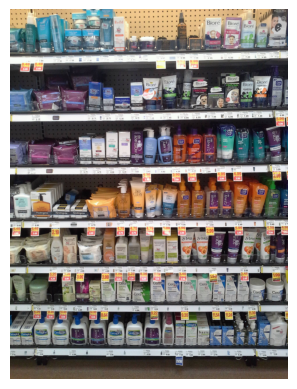

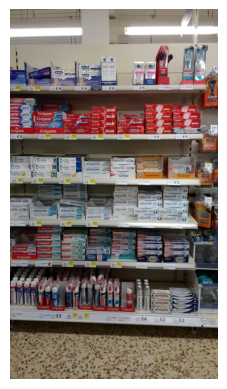

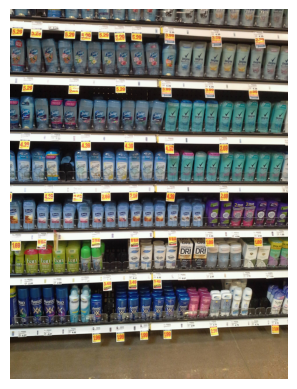

In [58]:
image_objects = []
target_size = [256, 256]
for image_path in image_path_train:
    image = cv2.imread(image_path)
    # image_resized = cv2.resize(image, target_size)  # Resize to target size
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # image_objects.append(image_resized)
    image_objects.append(image)
    
    # Display the image using matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide the axes
    plt.show()

# np.array(image_objects)

In [60]:
bbox_objects = []
for label_path in label_path_train:
    lines = []
    with open(label_path, 'r') as fp:
        for line in fp:
            # Split each line and skip the first element, then convert to float
            bbox = line.split()[1:]
            # Convert each value in bbox to float
            bbox = [float(value) for value in bbox]
            lines.append(bbox)
            # break
    bbox_objects.append(lines)
    print(len(bbox_objects[-1]))

123
155
123


In [61]:
def draw_one_image_with_bbox (image, bounding_boxes):
    print(image.shape, len(bounding_boxes))
    # Example bounding boxes: [x_min, y_min, width, height]
    # bounding_boxes = [
    #     [50, 50, 100, 150],  # Example bounding box 1
    #     [200, 80, 120, 100]  # Example bounding box 2
    # ]
    
    # Load the image using OpenCV
    # image_path = 'path/to/your/image.jpg'
    # image = cv2.imread(image_path)
    
    # Draw each bounding box on the image
    for bbox in bounding_boxes:
        x_center, y_center, width, height = bbox
        image_height, image_width = image.shape[:2]
        # print(image_width, image_height)
        
        x_min = int((x_center - width / 2) * image_width)
        y_min = int((y_center - height / 2) * image_height)
        x_max = int((x_center + width / 2) * image_width)
        y_max = int((y_center + height / 2) * image_height)

        # Draw the rectangle (Bounding Box)
        start_point = (x_min, y_min)
        end_point = (x_max, y_max)
        # print(start_point, end_point)
        color = (0, 255, 0)  # Green color for the bounding box
        thickness = 4
        image = cv2.rectangle(image, start_point, end_point, color, thickness)
    
    # Convert the image from BGR to RGB (OpenCV loads in BGR by default)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display the image with bounding boxes using Matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide the axes
    plt.show()

(2560, 1920, 3) 123


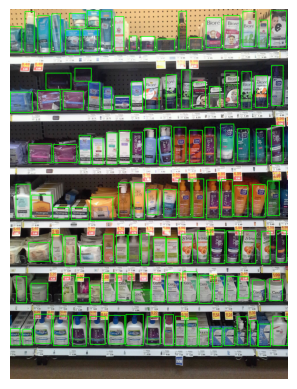

(4160, 2340, 3) 155


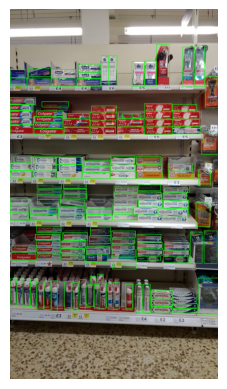

(2560, 1920, 3) 123


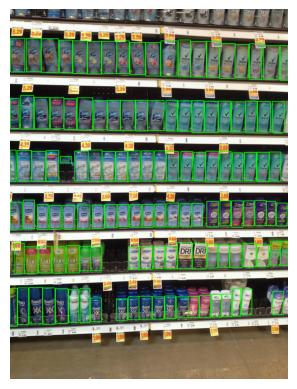

In [62]:
for i in range(len(image_objects)):
    draw_one_image_with_bbox (image_objects[i], bbox_objects[i])

In [ ]:
model = YOLO('yolo11n.pt')
result=model.predict(
    source='./01_data_prep/images/00001.jpg',
    conf=0.45,
    save=True
)